In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Features that will be extracted from the EM data and their shorter handle
wx__params = {
    "temperature_air_mean_200": "temp",
    "wind_speed": "wind",
    "pressure_air_site": "press",
    # "precipitation_height": "precip",
    "sunshine_duration": "sun"
}
outlier_columns=["01228", "02429", "04039", "00656", "00954", "03897", "03946", "00603"]
na_columns = ["00769", "00850", "02437", "00769", "00850", "02303",	"02437", "02564", "03513", "04371"]
# Concatenate all weather parameters into one data frame
wx__dict = {}
for name, handle in wx__params.items():
    wx__dict[handle]=(pd.read_pickle("../data/weather_all_stations/cleaned/"+name+".pkl")).drop(columns=outlier_columns+na_columns)

df = pd.concat(wx__dict.values(), axis=1, ignore_index=False, verify_integrity=True, keys=wx__dict.keys())
df.head()

temp                                          \
                            00102   00161   00164   00183   00198   00232   
2017-01-01 00:00:00+00:00  278.35  268.75  276.65  277.45  270.65  269.45   
2017-01-01 01:00:00+00:00  278.25  268.85  276.75  277.65  270.25  269.25   
2017-01-01 02:00:00+00:00  278.25  269.25  277.05  277.85  269.45  269.05   
2017-01-01 03:00:00+00:00  278.05  269.35  277.15  277.85  269.25  268.55   
2017-01-01 04:00:00+00:00  278.15  269.45  277.55  277.95  268.85  267.85   

                                                           ...   sun        \
                            00282   00298   00303   00342  ... 04177 04271   
2017-01-01 00:00:00+00:00  262.35  277.75  274.75  275.65  ...   0.0   0.0   
2017-01-01 01:00:00+00:00  262.75  277.75  274.65  275.15  ...   0.0   0.0   
2017-01-01 02:00:00+00:00  261.35  277.75  274.35  274.65  ...   0.0   0.0   
2017-01-01 03:00:00+00:00  261.15  277.95  274.55  274.25  ...   0.0   0.0   
2017-01-01 04:00:00+00:00  261.35  277.85  274.75  274.45  ...   0.0   0.0   

                                                                           
                          04336 04393 04464 04466 04501 04625 04642 04745  
2017-01-01 00:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 01:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 02:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 03:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2017-01-01 04:00:00+00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 468 columns]

In [121]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [122]:
from sklearn.decomposition import PCA
latent_dim = 8
# keep the latent_dim at 10, and put your solution below this line:
# YOUR CODE HERE
wx_pca=PCA(n_components=latent_dim)
#print(interpolated_data.reshape(29,202))
wx_pca_results=wx_pca.fit(X)
print(wx_pca_results.components_.shape)


(8, 468)


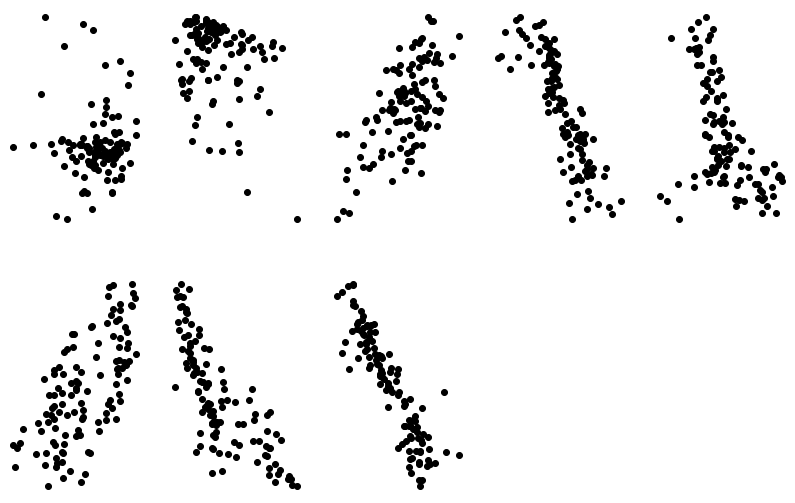

In [123]:

fig, axes = plt.subplots((latent_dim ) // 5 + 1, min(latent_dim,5),figsize=(14,9))
fig.patch.set_visible(False)

for i, ax in enumerate(axes.flat):
    if i < wx_pca_results.components_.shape[0]:
        ax.scatter(wx_pca_results.components_[i].reshape(df.columns.levshape)[0], 
                wx_pca_results.components_[i].reshape(df.columns.levshape)[2], 
                lw=1, color="black")
    ax.axis('off')

In [124]:
components = wx_pca.transform(X)
projected = wx_pca.inverse_transform(components)
print(projected.shape)
print(components.shape)

(43824, 468)
(43824, 8)


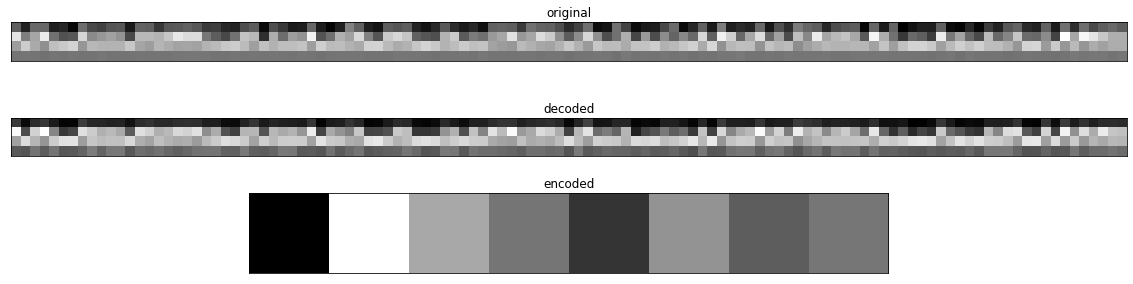

In [125]:
def plot_pca(X, decoded_imgs, encoded_imgs):
  n = 1
  offset=5
  plt.figure(figsize=(20,5))

  for i in range(n):
    # display original
    ax = plt.subplot(3*n, 1, i + 1)
    # plt.imshow(scaler.inverse_transform(df.reshape(df_test.shape))[i+offset].reshape(df.shape[1:]))
    plt.imshow(X[i+offset].reshape(df.columns.levshape))
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3*n, 1, i + 2)
    plt.imshow(decoded_imgs[i+offset].reshape(df.columns.levshape))
    plt.title("decoded")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3*n, 1, i + 3)
    plt.imshow(encoded_imgs[i+offset].reshape(latent_dim,1).transpose())
    plt.title("encoded")
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

plot_pca(X, projected, components)

In [147]:
PCA_df = pd.DataFrame(components, index=df.index, columns=["pca_"+str(i) for i in range(components.shape[-1])])
PCA_df.to_pickle("../data/weather/PCA_weather_"+str(latent_dim)+"_SSc.pkl")

<AxesSubplot:>

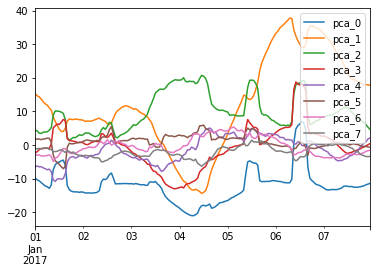

In [145]:
PCA_df.loc["2017-01-01":"2017-01-07", ["pca_"+str(i) for i in range(0,8)]].plot()

In [101]:
error_df=pd.DataFrame(X-projected, index=df.index, columns=df.columns)

In [128]:
el_df=pd.read_pickle("../data\prepared\electricity+time_2017-2021.pkl")
el_df.shape
df_total=pd.concat([el_df, PCA_df], axis=1)
df_total
df_total.to_csv("../data\prepared\elec_time_pca-wx_combined.csv")